<a href="https://colab.research.google.com/github/rogerioribeiromacedo/BioInformaticsProject/blob/main/Bioinformatics_Project_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part, we will be comparing several ML algorithms for build regression models of acetylcholinesterase innhibitors.



#1. Import libraries

In [1]:
! pip install lazypredict &> /dev/null

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import lazypredict

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

#2. Load the data set

In [3]:
! wget https://raw.githubusercontent.com/rogerioribeiromacedo/BioInformaticsProject/main/data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv &> /dev/null

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# 3. Data pre-processing

In [5]:
# Examine X dimension
X.shape

(5823, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(5823, 143)

In [7]:
# Perform data splitting using 80/20 ration
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#4. Compare ML algorithms

In [11]:
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [12]:
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[:10]
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor)]

In [13]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


In [15]:
# Performance table of the training set (80% subset)
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.38,0.46,1.16,0.53
ExtraTreesRegressor,0.17,0.27,1.35,7.83
ElasticNetCV,0.15,0.26,1.36,3.66
BayesianRidge,0.15,0.26,1.36,0.14
DecisionTreeRegressor,0.12,0.23,1.38,0.17
ExtraTreeRegressor,0.10,0.21,1.40,0.15
GammaRegressor,0.09,0.21,1.40,0.06
AdaBoostRegressor,0.03,0.15,1.45,0.64
DummyRegressor,-0.14,-0.00,1.57,0.03


In [16]:
# Performance table of the test set (20% subset)
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.38,0.46,1.16,0.53
ExtraTreesRegressor,0.17,0.27,1.35,7.83
ElasticNetCV,0.15,0.26,1.36,3.66
BayesianRidge,0.15,0.26,1.36,0.14
DecisionTreeRegressor,0.12,0.23,1.38,0.17
ExtraTreeRegressor,0.10,0.21,1.40,0.15
GammaRegressor,0.09,0.21,1.40,0.06
AdaBoostRegressor,0.03,0.15,1.45,0.64
DummyRegressor,-0.14,-0.00,1.57,0.03


#5. Data Visualization of model performance

[(0.0, 1.0)]

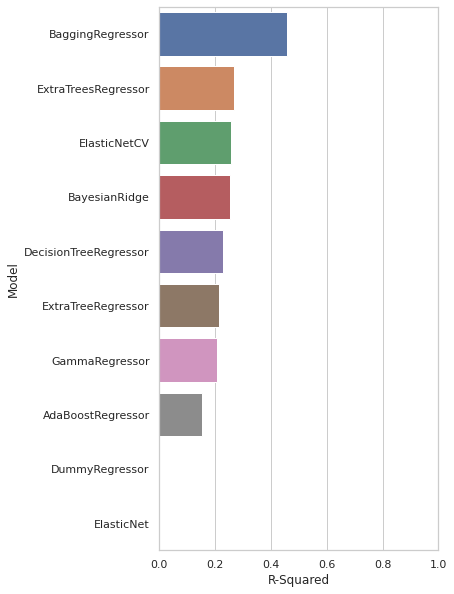

In [18]:
# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=models.index, x='R-Squared', data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

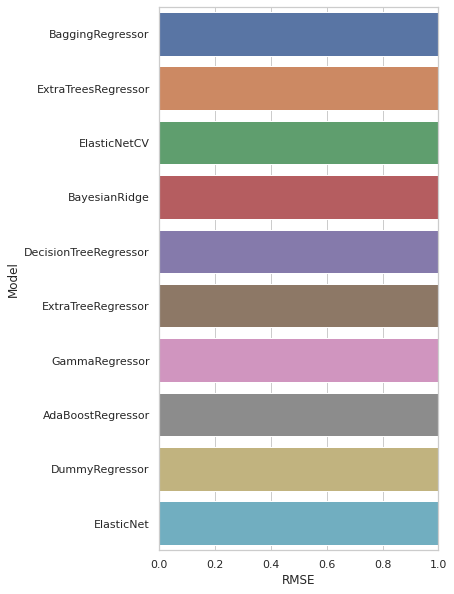

In [20]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=models.index, x='RMSE', data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

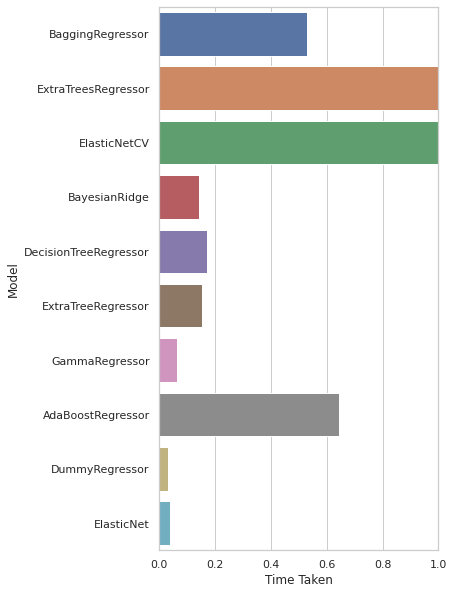

In [21]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=models.index, x='Time Taken', data=models)
ax.set(xlim=(0, 1))